# Diabetes Prediction Model

# importing required libraries

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###### loading the dataset

In [95]:
data=pd.read_csv(r"C:\Users\iiits\Documents\diabetes.csv")
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [96]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


## summary of dataset

In [97]:
df.shape

(768, 8)

In [98]:
df.index


RangeIndex(start=0, stop=768, step=1)

In [99]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

In [100]:
df.values

array([[  6. , 148. ,  72. , ...,  33.6,  50. ,   1. ],
       [  1. ,  85. ,  66. , ...,  26.6,  31. ,   0. ],
       [  8. , 183. ,  64. , ...,  23.3,  32. ,   1. ],
       ...,
       [  5. , 121. ,  72. , ...,  26.2,  30. ,   0. ],
       [  1. , 126. ,  60. , ...,  30.1,  47. ,   1. ],
       [  1. ,  93. ,  70. , ...,  30.4,  23. ,   0. ]])

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


## Visualisation

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

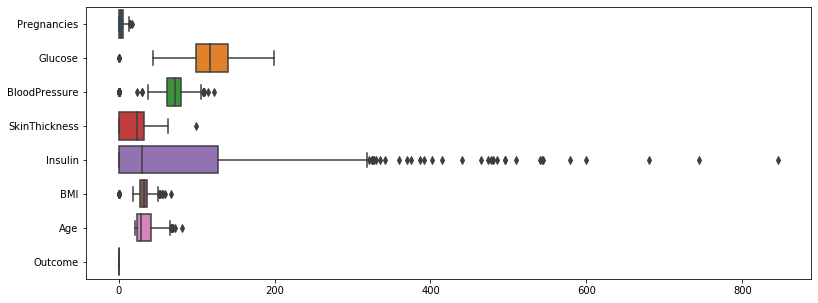

In [103]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

In [104]:
display(df.loc[(df.Insulin<50) & (df.Insulin!=0),["Glucose","Insulin","Outcome"]])

,Glucose,Insulin,Outcome
51,101,36,0
52,88,23,0
68,95,38,0
92,81,48,0
103,81,40,0
108,83,18,0
109,95,36,1
112,89,37,0
134,96,49,0
173,79,48,0


#### Finding outliers, delete the unwanted data and fill the null values

### finding outliers 

In [105]:
display(df.loc[(df.Insulin==0)&(df.Glucose>130)&(df.Outcome==0)&(df.BMI>30)&(df.Age>50),["Glucose","BloodPressure","BMI","Insulin","Outcome","Age"]])

,Glucose,BloodPressure,BMI,Insulin,Outcome,Age
148,147,78,33.7,0,0,65
212,179,95,34.2,0,0,60
263,142,80,32.4,0,0,63


### delete the outlier 

In [106]:
df=df.loc[~((df["Insulin"]==0)&(df["Glucose"]>130)&(df["Outcome"]==0)&(df["BMI"]>30)&(df["Age"]>50))]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [107]:
display(df.loc[df.Glucose==0,["Glucose","Insulin","Outcome","BMI","Age"]])

,Glucose,Insulin,Outcome,BMI,Age
75,0,0,0,24.7,22
182,0,23,0,27.7,21
342,0,0,0,32.0,22
349,0,0,1,41.0,37
502,0,0,1,39.0,41


#### deleting records whose glucose values are zero 

In [108]:
df=df.loc[~((df["Glucose"]==0))]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [109]:
display(df.loc[(df["Insulin"]==0)&(df["Outcome"]==1),["Glucose","Insulin","Outcome"]])

,Glucose,Insulin,Outcome
0,148,0,1
2,183,0,1
9,125,0,1
11,168,0,1
15,100,0,1
...,...,...,...
754,154,0,1
757,123,0,1
759,190,0,1
761,170,0,1


In [110]:
display(df.loc[(df.Insulin==0)&(df.Outcome==0),["Glucose","Insulin","Outcome"]])

,Glucose,Insulin,Outcome
1,85,0,0
5,116,0,0
7,115,0,0
10,110,0,0
12,139,0,0
...,...,...,...
756,137,0,0
758,106,0,0
762,89,0,0
764,122,0,0


### fill the null values of insulin with a suitable value  

In [111]:
df["Insulin"]=np.where((df["Insulin"]==0)&(df["Outcome"]==0),150,df["Insulin"])
df["Insulin"]=np.where((df["Insulin"]==0)&(df["Outcome"]==1),40,df["Insulin"])
df

C:\Users\iiits\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\iiits\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,40,33.6,50,1
1,1,85,66,29,150,26.6,31,0
2,8,183,64,0,40,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,150,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,40,30.1,47,1


## counting no.of people having diabets and no.of people not having diabets

In [112]:
df.groupby("Outcome").min()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
Outcome,,,,,,,
0,0,44,0,0,15,0.0,21
1,0,78,0,0,14,0.0,21


In [113]:
df["Outcome"].value_counts()

0    494
1    266
Name: Outcome, dtype: int64

#### [0----> not having diabets and 1----> having daibets]

### seperating label from the data

In [114]:
x=df.drop(columns="Outcome",axis=1)
y=df["Outcome"]

In [115]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0              6      148             72             35       40  33.6   50
1              1       85             66             29      150  26.6   31
2              8      183             64              0       40  23.3   32
3              1       89             66             23       94  28.1   21
4              0      137             40             35      168  43.1   33
..           ...      ...            ...            ...      ...   ...  ...
763           10      101             76             48      180  32.9   63
764            2      122             70             27      150  36.8   27
765            5      121             72             23      112  26.2   30
766            1      126             60              0       40  30.1   47
767            1       93             70             31      150  30.4   23

[760 rows x 7 columns]


In [116]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 760, dtype: int64


#### x contains input data and y contains the label

## Data Preprocessing

### replacing zeros with mean values

In [117]:
x.replace(to_replace=0,value=df.mean(),inplace=True)

In [118]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,4.409287,121.551316,72.235440,26.592639,133.359211,32.443936,33.155263
std,2.989502,30.502079,12.109806,9.649327,95.866281,6.892101,11.648434
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000
25%,2.000000,99.000000,64.000000,20.497368,56.750000,27.500000,24.000000
50%,3.847368,117.000000,72.000000,23.000000,150.000000,32.000000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,150.000000,36.600000,40.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000


### data standardization

In [119]:
scaler=StandardScaler()

In [120]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [121]:
standardized_data=scaler.transform(x)
standardized_data

array([[ 0.53245024,  0.86768191, -0.01945488, ..., -0.97448958,
         0.16784795,  1.4470469 ],
       [-1.14117077, -1.19911127, -0.51524741, ...,  0.17369766,
        -0.84847634, -0.18514785],
       [ 1.20189864,  2.01590034, -0.68051159, ..., -0.97448958,
        -1.32760065, -0.09924287],
       ...,
       [ 0.19772604, -0.0180866 , -0.01945488, ..., -0.22294884,
        -0.90655201, -0.27105284],
       [-1.14117077,  0.14594461, -1.01103994, ..., -0.97448958,
        -0.3403142 ,  1.18933194],
       [-1.14117077, -0.93666134, -0.18471906, ...,  0.17369766,
        -0.29675744, -0.87238775]])

In [122]:
x=standardized_data
y=df["Outcome"]

## Spliting data into testing and training

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [124]:
print(x.shape,x_train.shape,x_test.shape)

(760, 7) (684, 7) (76, 7)


### Training the model

In [125]:
classifier=svm.SVC(kernel="linear")   #SVC -> support vector clasifier

In [126]:
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### model evaluation

In [127]:
#accuracy score
x_train_predict=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)

In [128]:
print("Accuracy score of training set  is:",training_data_accuracy)

Accuracy score of training set  is: 0.7997076023391813


In [129]:
x_test_predict=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_predict,y_test)

In [130]:
print("Accuracy score of testing set  is:",testing_data_accuracy)

Accuracy score of testing set  is: 0.8026315789473685


### making prediction system

In [139]:
input_data=(0,170,70,21,22,130,24)
input_data_as_array=np.asarray(input_data)
#reshapping the array for predicting one instance
input_data_reshaped=input_data_as_array.reshape(1,-1)
#we have to standardized the data because our training data is in standard form
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[-1.47589497  1.58941921 -0.18471906 -0.57997015 -1.16237476 14.16408525
  -0.78648277]]


In [140]:
prediction=classifier.predict(std_data)
print(prediction)
if(prediction[0]==0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[1]
The person is diabetic
